In [78]:
import tensorflow as tf
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Flatten,Dense,Dropout
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam

In [79]:
dir='/content/drive/MyDrive/potato-dataset'

In [80]:
batch_size = 32
img_size = 299

In [81]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  dir,
  validation_split=0.20,
  subset="training",
  seed=123,
  image_size=(img_size, img_size),
  batch_size=batch_size)

Found 2157 files belonging to 3 classes.
Using 1726 files for training.


In [82]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  dir,
  validation_split=0.25,
  subset="validation",
  seed=123,
  image_size=(img_size, img_size),
  batch_size=batch_size)

Found 2157 files belonging to 3 classes.
Using 539 files for validation.


In [83]:
class_names = train_ds.class_names
print(class_names)

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']


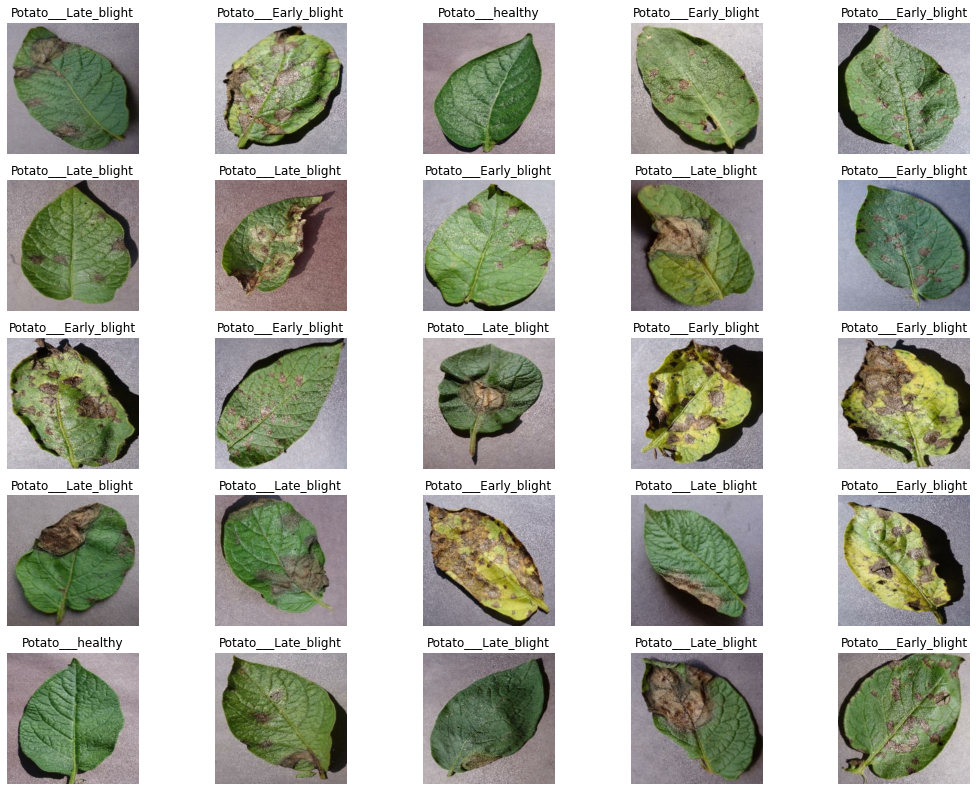

In [84]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 14))
for images, labels in train_ds.take(1):
  for i in range(25):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

## Model-Building

In [86]:
xception_model = Sequential()
pretrained_model = tf.keras.applications.Xception(
    include_top = False,
    input_shape = (img_size,img_size,3),
    classes = 3,
    weights = 'imagenet')
for layer in pretrained_model.layers:
  layer.trainable = False

xception_model.add(pretrained_model)
xception_model.add(Flatten())
xception_model.add(Dense(units = 3,activation = 'softmax'))

In [87]:
xception_model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 10, 10, 2048)      20861480  
_________________________________________________________________
flatten_11 (Flatten)         (None, 204800)            0         
_________________________________________________________________
dense_13 (Dense)             (None, 3)                 614403    
Total params: 21,475,883
Trainable params: 614,403
Non-trainable params: 20,861,480
_________________________________________________________________


In [88]:
xception_model.compile(optimizer=Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [89]:
history = xception_model.fit(train_ds,validation_data=val_ds,epochs=5)

Epoch 1/5
54/54 [==============================] - 47s 777ms/step - loss: 92.3694 - accuracy: 0.7051 - val_loss: 55.3489 - val_accuracy: 0.7328
Epoch 2/5
54/54 [==============================] - 39s 708ms/step - loss: 31.1775 - accuracy: 0.8413 - val_loss: 49.7745 - val_accuracy: 0.7069
Epoch 3/5
54/54 [==============================] - 39s 714ms/step - loss: 27.8427 - accuracy: 0.8430 - val_loss: 29.2365 - val_accuracy: 0.8571
Epoch 4/5
54/54 [==============================] - 39s 716ms/step - loss: 13.6432 - accuracy: 0.9038 - val_loss: 23.3510 - val_accuracy: 0.8571
Epoch 5/5
54/54 [==============================] - 39s 715ms/step - loss: 10.6870 - accuracy: 0.9241 - val_loss: 26.9848 - val_accuracy: 0.8126


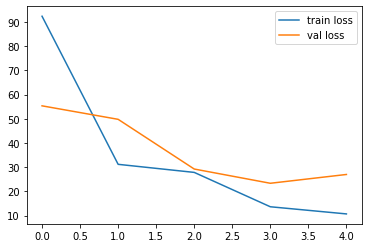

<Figure size 432x288 with 0 Axes>

In [90]:
 # loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

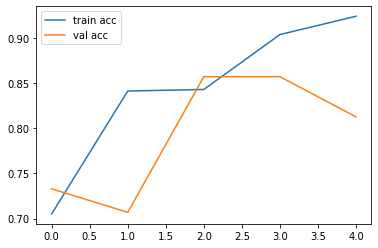

<Figure size 432x288 with 0 Axes>

In [91]:
# accuracies
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [94]:
from tensorflow.keras.preprocessing import image
def classify(img_path):
    img = image.load_img(img_path, target_size=(299, 299))
    img_array = image.img_to_array(img)

    img_array = np.expand_dims(img_array, axis=0)
    result = xception_model.predict(img_array)

    label = class_names[np.argmax(result)]
    return label

In [95]:
prediction = classify('/content/drive/MyDrive/potato-dataset/Potato___Late_blight/0051e5e8-d1c4-4a84-bf3a-a426cdad6285___RS_LB 4640.JPG')
print(prediction)

Potato___Late_blight


In [96]:
resnet_model.save('potata_xception.h5')

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)
